# Single Substitution Simulation Run Trace

(c) 2020 Tom Röschinger. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

***

In [7]:
using LinearAlgebra, Jevo, Jedi, Plots, LambertW
Jedi.default_gr!()

# Parameters
reps = 500
steps = 2 * 10^6
rho = 5
l_0 = 10
N = 100
nu = 1/N
emat = 2 * (ones(4, 4) - Matrix{Float64}(I, 4, 4))

4×4 Array{Float64,2}:
 0.0  2.0  2.0  2.0
 2.0  0.0  2.0  2.0
 2.0  2.0  0.0  2.0
 2.0  2.0  2.0  0.0

In [8]:
f0 = 200/2N
ϵ = 2
n = 4

l0_kappa(kappa, l) = 1/2 * lambertw(2 * ϵ^2 * N * l * f0 * (n-1)/n^2 * exp(10)/(1+kappa))
fl(l_opt) = l0_kappa(0, 10)/10^2 * n^2 / (n-1) * 1/ϵ
fl_new(l_opt) = l0_kappa(0, 10)^2 / l_opt^2 * n^2 / (n-1) * 1/2

F = Jevo.fermi_fitness(f0=f0, fl=fl_new(10)/2N)
fl(10)

0.19506849093440157

In [11]:
rho=0
pop = Jevo.mono_pop(N=100, l=l_0)
Jevo.initiate!(pop, opt=true)
t0 = zeros(2, steps)
for i in 1:steps
    Jevo.bp_substitution!(pop, emat, F)
    if rand() < rho/N
        Jevo.driver_mutation!(pop)
    end
    if rand() < nu
        Jevo.l_substitution!(pop, emat, F)
    end
    # Recover lost sites
    if length(pop.seqs) < 7
        Jevo.initiate!(pop, opt=true)
    end
    t0[:, i] = [Jevo.get_energy(pop, emat), length(pop.seqs)] 
end

rho=5
pop = Jevo.mono_pop(N=100, l=l_0)
Jevo.initiate!(pop, opt=true)
t5 = zeros(2, steps)
for i in 1:steps
    Jevo.bp_substitution!(pop, emat, F)
    if rand() < rho/N
        Jevo.driver_mutation!(pop)
    end
    if rand() < nu
        Jevo.l_substitution!(pop, emat, F)
    end
    # Recover lost sites
    if length(pop.seqs) < 7
        Jevo.initiate!(pop, opt=true)
    end
    t5[:, i] = [Jevo.get_energy(pop, emat), length(pop.seqs)] 
end

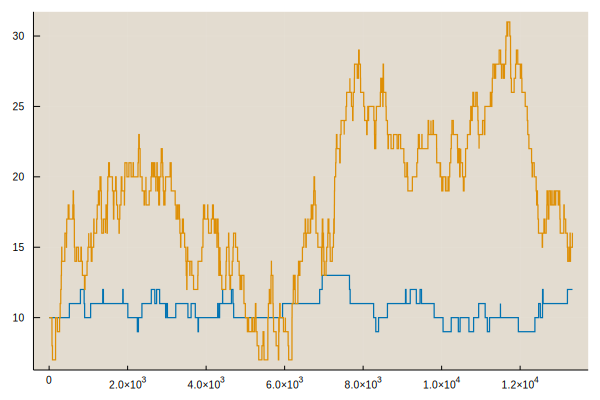

In [12]:
plot(t0[2, 1:150:end])
plot!(t5[2, 1:150:end])